In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def read_data(): ##read data from file influencers.csv
    df = pd.read_csv('influencers.csv')
    return df

In [3]:
def followers_low(x): ##membership function for followers count (low)
    if x <= 10000:
        return 1
    elif x > 25000:
        return 0
    else:
        return (25000-x)/(25000-10000)
    
def followers_avg(x): ##membership function for followers count (average)
    if x <= 10000 or x > 45000:
        return 0
    elif x > 10000 and x <= 27000:
        return (x-10000)/(27000-10000)
    elif x > 27000 and x < 35000:
        return 1
    else:
        return (45000-x)/(45000-35000)

def followers_high(x): ##membership function for followers count (high)
    if x <= 30000:
        return 0
    elif x > 45000:
        return 1
    else:
        return (x-30000)/(45000-30000)

In [4]:
def engagement_low(x): ##membership function for engagement rate (low)
    if x <= 1.0:
        return 1
    elif x > 1.5:
        return 0
    else:
        return (1.5-x)/(1.5-1.0)
    
def engagement_avg(x): ##membership function for engagement rate (average)
    if x <= 1.0 or x > 3.5:
        return 0
    elif x > 1.0 and x <= 2.0:
        return (x-1.0)/(2.0-1.0)
    elif x > 2.0 and x < 2.7:
        return 1
    else:
        return (3.5-x)/(3.5-2.7)

def engagement_high(x): ##membership function for engagement rate (high)
    if x <= 2.5:
        return 0
    elif x > 3.5:
        return 1
    else:
        return (x-2.5)/(3.5-2.5)

In [5]:
def fuzzification(x,y): ##fuzzification
    fuzzyInput = []
    info = {}
    for i in range(len(x)):
        info = {'followers_low': followers_low(x[i]),
                'followers_avg': followers_avg(x[i]),
                'followers_high': followers_high(x[i]),
                'engagement_low': engagement_low(y[i]),
                'engagement_avg': engagement_avg(y[i]),
                'engagement_high': engagement_high(y[i])
        }
        fuzzyInput.append(info.copy())
    return fuzzyInput

In [6]:
def inference(x): ##inference
    influencerScore = []
    
    for i in range(len(fuzzyInput)):
        info = {}
        scoreAccepted= []
        scoreConsidered = []
        scoreRejected = []
        
        scoreAccepted.append(min(fuzzyInput[i]['followers_high'], fuzzyInput[i]['engagement_high']))
        scoreAccepted.append(min(fuzzyInput[i]['followers_high'], fuzzyInput[i]['engagement_avg']))
        scoreConsidered.append(min(fuzzyInput[i]['followers_high'], fuzzyInput[i]['engagement_low']))
        
        scoreAccepted.append(min(fuzzyInput[i]['followers_avg'], fuzzyInput[i]['engagement_high']))
        scoreConsidered.append(min(fuzzyInput[i]['followers_avg'], fuzzyInput[i]['engagement_avg']))
        scoreRejected.append(min(fuzzyInput[i]['followers_avg'], fuzzyInput[i]['engagement_low']))
        
        scoreConsidered.append(min(fuzzyInput[i]['followers_low'], fuzzyInput[i]['engagement_high']))
        scoreRejected.append(min(fuzzyInput[i]['followers_low'], fuzzyInput[i]['engagement_avg']))
        scoreRejected.append(min(fuzzyInput[i]['followers_low'], fuzzyInput[i]['engagement_low']))
        
        info = {'accepted': max(scoreAccepted),
                'considered': max(scoreConsidered),
                'rejected': max(scoreRejected)
        }
        influencerScore.append(info.copy())
        
    return influencerScore

In [7]:
def defuzzification(x): ##defuzzification with takagi-sugeno style
    finalScore = []
    for i in range(len(x)):
        info = {}
        calc =  ((x[i]['accepted']*100)+(x[i]['considered']*70)+(x[i]['rejected']*50))/(x[i]['accepted']+x[i]['considered']+x[i]['rejected'])
        info = {
            'index': i+1,
            'score': calc
        }
        finalScore.append(info.copy())
    return finalScore

In [8]:
##main
df = read_data()
followers = df['followerCount'].values
engagement = df['engagementRate'].values

fuzzyInput = fuzzification(followers, engagement)

fuzzyOutput = inference(fuzzyInput)

defuz = defuzzification(fuzzyOutput)

defuz.sort(key=lambda defuz:defuz['score'],reverse=True)

chosen = []

for i in range(20):
    chosen.append(defuz[i]['index'])
    
print(chosen)

pd.DataFrame(chosen).to_csv('chosen.csv')

[11, 13, 19, 25, 41, 53, 59, 60, 61, 72, 75, 93, 2, 67, 50, 74, 36, 76, 6, 63]


Text(0.5, 1.0, 'followersCount')

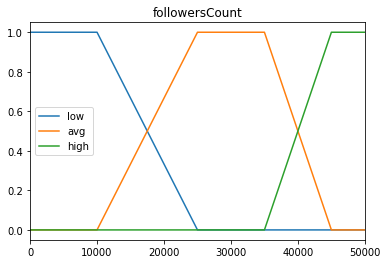

In [9]:
df = pd.DataFrame({
    'low': [1,1,0,0,0,0,0],
    'avg': [0,0,1,1,1,0,0],
    'high':[0,0,0,0,0,1,1]
    }, index=[0,10000,25000,27000,35000,45000,50000])
lines = df.plot.line()
lines.set_title("followersCount")

Text(0.5, 1.0, 'engagementRate')

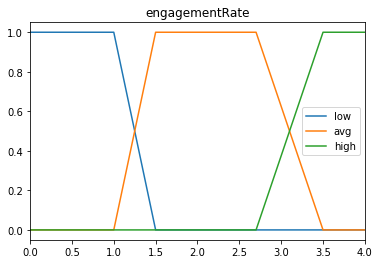

In [10]:
df = pd.DataFrame({
    'low': [1,1,0,0,0,0,0,0],
    'avg': [0,0,1,1,1,1,0,0],
    'high':[0,0,0,0,0,0,1,1]
    }, index=[0,1.0,1.5,2.0,2.5,2.7,3.5,4.0])
lines = df.plot.line()
lines.set_title("engagementRate")